In [1]:
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt

# 1) Neural Probabilistic LM - Dataset

In [2]:
words = open('names.txt', 'r').read().splitlines()

In [3]:
chars = sorted(list(set(''.join(words))))
stoi = {s:i+1 for i, s in enumerate(chars)}
stoi['.'] = 0
itos = dict(zip(stoi.values(), stoi.keys()))

In [4]:
def build_dataset(words):
    block_size = 3
    X, Y = [], []
    for w in words:
        context = [0]*block_size
        for ch in w + '.':
            ix = stoi[ch]
            X.append(context)
            Y.append(ix)
            context = context[1:] + [ix]
    X = torch.tensor(X)
    Y = torch.tensor(Y)
    return X, Y

import random
random.seed(42)
random.shuffle(words)
n1 = int(0.8*len(words))
n2 = int(0.9*len(words))

Xtr, Ytr = build_dataset(words[:n1])
Xdev, Ydev = build_dataset(words[n1:n2])
Xte, Ye = build_dataset(words[n2:])

# 2) Neural Probabilistic LM - Optimal LR

In [5]:
g = torch.Generator().manual_seed(2147483647)
C = torch.randn((27, 2))
W1 = torch.randn((6, 300))
b1 = torch.randn((300))
W2 = torch.randn((300, 27))
b2 = torch.randn((27))
parameters = [C, W1, b1, W2, b2]

for p in parameters:
    p.requires_grad = True

In [6]:
lre = torch.linspace(-3, 0, 1000)
lrs = 10**lre

23.49153709411621


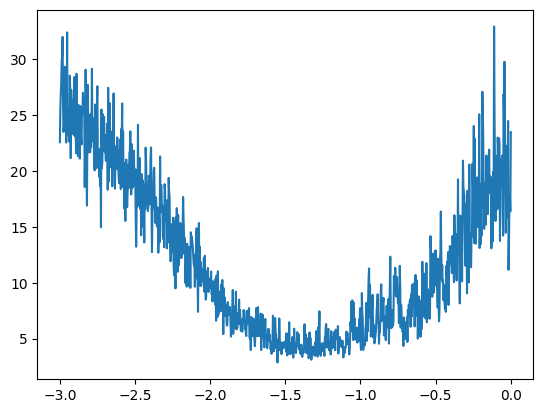

In [7]:
lri = []
lossi = []
stepi = []
for i in range(1000):
    # minibatch
    ix = torch.randint(0, Xtr.shape[0], (32,))
    
    # forward pas
    emb = C[Xtr[ix]]
    h = torch.tanh(emb.view(emb.shape[0], 6) @ W1 + b1)
    logits = h @ W2 + b2
    loss = F.cross_entropy(logits, Ytr[ix])

    # backward pass
    for p in parameters:
        p.grad = None
    loss.backward()

    # update
    lr = lrs[i]
    for p in parameters:
        p.data += -lr*p.grad
        
    # logs
    lri.append(lre[i])
    lossi.append(loss.item())
print(loss.item())
plt.plot(lri, lossi);

# 3) Neural Probabilistic LM - Train

In [8]:
g = torch.Generator().manual_seed(2147483647)
C = torch.randn((27, 2))
W1 = torch.randn((6, 300))
b1 = torch.randn((300))
W2 = torch.randn((300, 27))
b2 = torch.randn((27))
parameters = [C, W1, b1, W2, b2]

for p in parameters:
    p.requires_grad = True

2.4622650146484375


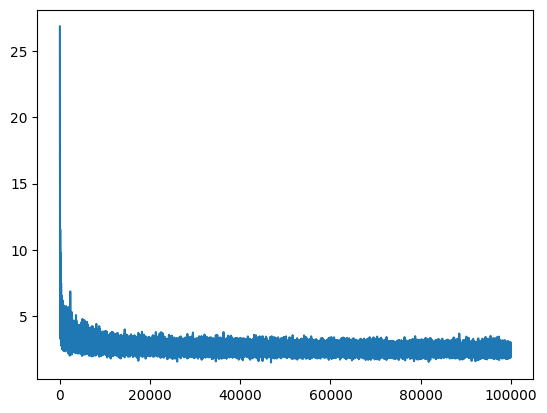

In [9]:
stepi = []
lossi = []
for i in range(100000):
    # minibatch
    ix = torch.randint(0, Xtr.shape[0], (32,))
    
    # forward pas
    emb = C[Xtr[ix]]
    h = torch.tanh(emb.view(emb.shape[0], 6) @ W1 + b1)
    logits = h @ W2 + b2
    loss = F.cross_entropy(logits, Ytr[ix])

    # backward pass
    for p in parameters:
        p.grad = None
    loss.backward()

    # update
    lr = 0.1
    for p in parameters:
        p.data += -lr*p.grad
        
    # log
    lossi.append(loss.item())
    stepi.append(i)
print(loss.item())
plt.plot(stepi, lossi)

In [10]:
emb = C[Xtr]
h = torch.tanh(emb.view(emb.shape[0], 6) @ W1 + b1)
logits = h @ W2 + b2
loss = F.cross_entropy(logits, Ytr)
loss.item()

2.4161524772644043

In [11]:
emb = C[Xdev]
h = torch.tanh(emb.view(emb.shape[0], 6) @ W1 + b1)
logits = h @ W2 + b2
loss = F.cross_entropy(logits, Ydev)
loss.item()

2.4195005893707275

# 4) Neural Probabilistic LM - Finer LR to improve loss

2.3945565223693848


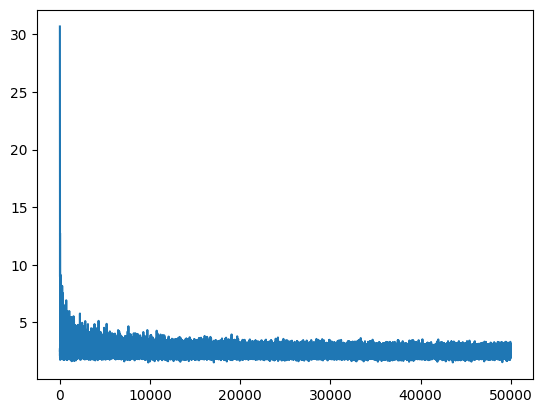

In [12]:
for i in range(300000):
    # minibatch
    ix = torch.randint(0, Xtr.shape[0], (32,))
    
    # forward pas
    emb = C[Xtr[ix]]
    h = torch.tanh(emb.view(emb.shape[0], 6) @ W1 + b1)
    logits = h @ W2 + b2
    loss = F.cross_entropy(logits, Ytr[ix])

    # backward pass
    for p in parameters:
        p.grad = None
    loss.backward()

    # update
    lr = 0.01
    for p in parameters:
        p.data += -lr*p.grad
        
    # log
    lossi.append(loss.item())
    stepi.append(i)
print(loss.item())
plt.plot(stepi, lossi)

In [13]:
emb = C[Xtr]
h = torch.tanh(emb.view(emb.shape[0], 6) @ W1 + b1)
logits = h @ W2 + b2
loss = F.cross_entropy(logits, Ytr)
loss.item()

2.2797954082489014

In [14]:
emb = C[Xdev]
h = torch.tanh(emb.view(emb.shape[0], 6) @ W1 + b1)
logits = h @ W2 + b2
loss = F.cross_entropy(logits, Ydev)
loss.item()

2.2789580821990967

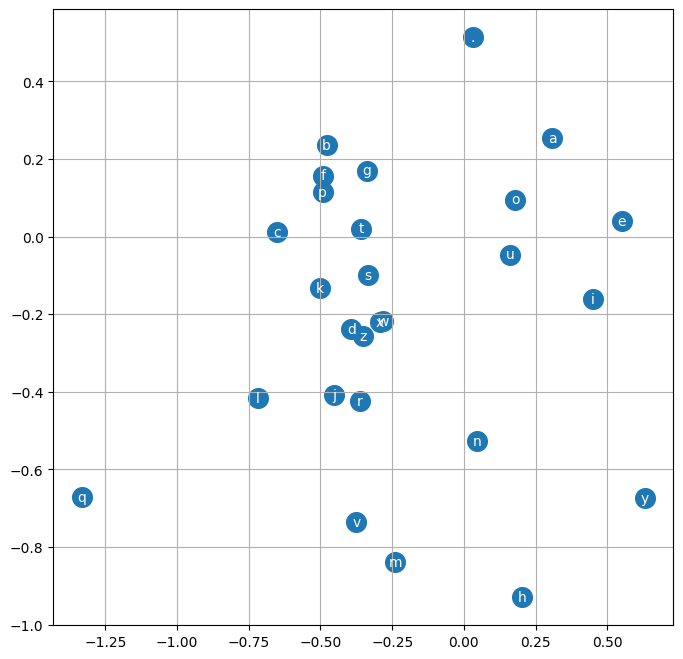

In [12]:
plt.figure(figsize=(8, 8))
plt.scatter(C[:, 0].data, C[:, 1].data, s=200)
for i in range(C.shape[0]):
    plt.text(C[i, 0].item(), C[i, 1].item(),itos[i], ha="center", va="center", color='white')
    plt.grid('minor')

# 5) Neural Probabilistic LM - Larger embedding space

In [13]:
g = torch.Generator().manual_seed(2147483647)
C = torch.randn((27, 10))
W1 = torch.randn((30, 300))
b1 = torch.randn((300))
W2 = torch.randn((300, 27))
b2 = torch.randn((27))
parameters = [C, W1, b1, W2, b2]

In [14]:
for p in parameters:
    p.requires_grad = True

In [15]:
stepi = []
lossi = []

In [16]:
for i in range(300000):
    # minibatch
    ix = torch.randint(0, Xtr.shape[0], (32,))
    
    # forward pas
    emb = C[Xtr[ix]]
    h = torch.tanh(emb.view(emb.shape[0], 30) @ W1 + b1)
    logits = h @ W2 + b2
    loss = F.cross_entropy(logits, Ytr[ix])

    # backward pass
    for p in parameters:
        p.grad = None
    loss.backward()

    # update
    lr = 0.1 if i < 100000 else 0.01
    for p in parameters:
        p.data += -lr*p.grad
        
    # log
    lossi.append(loss.log10().item())
    stepi.append(i)
print(loss.item())

2.0529286861419678


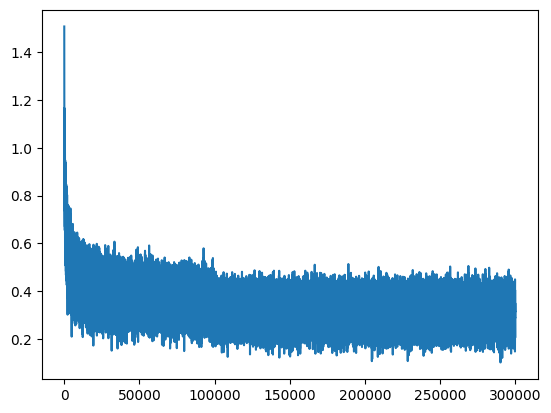

In [17]:
plt.plot(stepi, lossi)

In [18]:
emb = C[Xtr]
h = torch.tanh(emb.view(emb.shape[0], 30) @ W1 + b1)
logits = h @ W2 + b2
loss = F.cross_entropy(logits, Ytr)
loss.item()

2.088167905807495

In [19]:
emb = C[Xdev]
h = torch.tanh(emb.view(emb.shape[0], 30) @ W1 + b1)
logits = h @ W2 + b2
loss = F.cross_entropy(logits, Ydev)
loss.item()

2.14206862449646

In [21]:
block_size = 3
g = torch.Generator().manual_seed(2147483647)
for _ in range(20):
    out = []
    context = [0]*block_size
    while True:
        emb = C[torch.tensor([context])]
        h = torch.tanh(emb.view(1, -1) @ W1 + b1)
        logits = h @ W2 + b2
        probs = F.softmax(logits, dim=1)
        ix = torch.multinomial(probs, num_samples=1, generator=g).item()
        context = context[1:] + [ix]
        out.append(ix)
        if ix == 0:
            break
    print(''.join(itos[i] for i in out))

cerie.
corlynn.
rochukwu.
melliston.
inra.
avi.
kata.
kremiyah.
javer.
gotti.
moriellahu.
keyten.
jen.
emiless.
suhakaviyn.
rosbstih.
cameevon.
las.
dashra.
antil.
